In [1]:
import pandas as pd
import openai
import os
from openai.embeddings_utils import cosine_similarity, get_embedding
from transformers import pipeline
import numpy as np
import tiktoken
openai.api_key = os.getenv('OPENAI_API_KEY')
%matplotlib inline

In [2]:
labeles_dic={
"E1":"Climate Change. Transition plan, policies, actions, resources, and targets relating to climate change. Energy consumption, Scope 1, 2, 3, and total GHG emissions and Greenhouse gas removal. Carbon pricing and financial effects related to climate change ",
"E2":"Pollution. Policies, Actions, and Targets related to pollution. Pollution of air, water, and soil. Substances of concern and potential financial effects from pollution",
"E3":"Water and marine resources. Policies, Actions, and Targets related to water and marine resources. Water consumption. Financial effects relating to water and marine resources",
"E4":"Biodiversity and ecosystems. The transition plan, policies, actions, resources, and targets related to biodiversity and ecosystems. Impact on biodiversity and ecosystems. Financial effects related to biodiversity and ecosystems",
"E5":"Resource use and circular economy.Policies, Actions, and Targets related to recycling. Resources inflows and Resource outflows. Financial effects related to Resource use and circular economy",
"S1":"Own workforce. Policies, processes for engagement, and action to remediate negative impact on own workforce. Characteristics of employees and non-employees. Collective bargaining, diversity, adequate wage, social protection, training, and health and work-life balance indicators. Compensation and incident reporting",
"S2":"Workers in the value chain. Policies, targets, processes for engagement and action to remediate negative impact on Workers in the value chain",
"S3":"Affected communities. Policies, and processes for engaging and remediating negative impact for Affected communities. Action and targets related to affected communities",
"S4":"Consumers and end-users. Policies, and processes for engaging and remediating negative impact for Consumers and end-users. Action and targets related to Consumers and end-users",
"G1":"Business Conduct. Corporate culture and business conduct policies, relationship with suppliers. Prevention and detection of corruption or bribery. Political influence and lobbying. Payment practices "}


In [3]:
#Read data with embeddings
mylist = []
for chunk in  pd.read_csv('..\\data_with_embeddings.csv', chunksize=20000, index_col=0):
    mylist.append(chunk)

big_data = pd.concat(mylist, axis= 0)
del mylist

In [4]:
big_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149083 entries, 0 to 149082
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   text        149083 non-null  object
 1   Company     149083 non-null  object
 2   year        149083 non-null  int64 
 3   n_tokens    149083 non-null  int64 
 4   embeddings  149083 non-null  object
dtypes: int64(2), object(3)
memory usage: 6.8+ MB


In [5]:
CRSD_Lables=list(labeles_dic.keys())
labels=list(labeles_dic.values())
label_embeddings = [openai.Embedding.create(input=[i], model='text-embedding-ada-002')['data'][0]['embedding'] for i in labels]

In [6]:
# Sorts results from highest similarity score to lowest and adds appropriate label
def sorted_embedings(sim):
    results_list=[]       
    for i in range(0,10):
        results_list.append([CRSD_Lables[i],sim[i]])
    results_list.sort(key = lambda i: i[1],reverse = True)
    return results_list

In [7]:
#Convert string embeddings into floats
def float_embeddings(df_in):
    df=df_in.copy()
    embeddings=[]
    for i in range(0,len(df)):
        str_list=df.embeddings[i]
        str_list=str_list.strip("[]")
        str_list=str_list.split(',')
        float_list=[float(x) for x in str_list]
        embeddings.append(float_list)
        if i % 1000 == 0:
            print(i/len(df) *100,"% done")
    return embeddings

In [8]:
embeddings=float_embeddings(big_data)

0.0 % done
0.6707672907038361 % done
1.3415345814076722 % done
2.0123018721115082 % done
2.6830691628153445 % done
3.3538364535191807 % done
4.0246037442230165 % done
4.695371034926852 % done
5.366138325630689 % done
6.036905616334525 % done
6.707672907038361 % done
7.378440197742197 % done
8.049207488446033 % done
8.719974779149869 % done
9.390742069853705 % done
10.06150936055754 % done
10.732276651261378 % done
11.403043941965214 % done
12.07381123266905 % done
12.744578523372887 % done
13.415345814076723 % done
14.086113104780559 % done
14.756880395484394 % done
15.427647686188232 % done
16.098414976892066 % done
16.7691822675959 % done
17.439949558299737 % done
18.110716849003573 % done
18.78148413970741 % done
19.452251430411245 % done
20.12301872111508 % done
20.79378601181892 % done
21.464553302522756 % done
22.13532059322659 % done
22.806087883930427 % done
23.476855174634263 % done
24.1476224653381 % done
24.818389756041938 % done
25.489157046745774 % done
26.15992433744961 %

In [9]:
zero_shot_resluts=[]

In [10]:
for i in range(0,len(embeddings)):
    sim = [cosine_similarity(embeddings[i], j) for j in label_embeddings]
    zero_shot_resluts.append(sorted_embedings(sim))
    if i % 1000 == 0:
        print(len(zero_shot_resluts),"   rows done out of", len(big_data),"    ",len(zero_shot_resluts)/len(big_data) *100,"% done" )

1    rows done out of 149083      0.0006707672907038362 % done
1001    rows done out of 149083      0.6714380579945399 % done
2001    rows done out of 149083      1.342205348698376 % done
3001    rows done out of 149083      2.012972639402212 % done
4001    rows done out of 149083      2.6837399301060483 % done
5001    rows done out of 149083      3.3545072208098845 % done
6001    rows done out of 149083      4.025274511513721 % done
7001    rows done out of 149083      4.6960418022175565 % done
8001    rows done out of 149083      5.366809092921393 % done
9001    rows done out of 149083      6.037576383625229 % done
10001    rows done out of 149083      6.708343674329065 % done
11001    rows done out of 149083      7.3791109650329005 % done
12001    rows done out of 149083      8.049878255736738 % done
13001    rows done out of 149083      8.720645546440574 % done
14001    rows done out of 149083      9.39141283714441 % done
15001    rows done out of 149083      10.062180127848245 % d

In [11]:
big_data["zero_shot_results"]=zero_shot_resluts

In [12]:
big_data.head()

,text,Company,year,n_tokens,embeddings,zero_shot_results
0,Augmented reality makes the fascination of Por...,Porsche,2016,75,"[-0.004225385375320911, 0.01583165116608143, 0...","[[E1, 0.7216381414092714], [G1, 0.713927566212..."
1,"and encourage you, to confront, challenge and ...",Porsche,2016,89,"[0.001987969968467951, -0.019381854683160782, ...","[[G1, 0.8020255128630671], [S1, 0.778493516136..."
2,"For inspiration, consider the information re g...",Porsche,2016,45,"[-0.006319205742329359, 0.0064370157197117805,...","[[G1, 0.7796663944733939], [E1, 0.765844948693..."
3,The second volume is called Performance and co...,Porsche,2016,49,"[-0.0010906282113865018, -0.025131287053227425...","[[E1, 0.7976808365273889], [G1, 0.775051160718..."
4,"The two volumes may be different, but they hav...",Porsche,2016,54,"[0.009442666545510292, 0.004147251136600971, 0...","[[E1, 0.7502377571581], [E3, 0.740657668431401..."


In [13]:
big_data.to_csv("..\\zero_shot_results.csv", columns=["Company","year","text","zero_shot_results"])

In [14]:
top_rezult=[]

In [15]:
for i in range(0,len(big_data)):
    top_rezult.append(big_data.zero_shot_results[i][0])

In [16]:
top_results_df=pd.DataFrame(top_rezult,columns=["Label","sim_score"])

In [17]:
top_results_df.head()

,Label,sim_score
0,E1,0.721638
1,G1,0.802026
2,G1,0.779666
3,E1,0.797681
4,E1,0.750238


In [21]:
results_df=big_data[["text","Company","year"]]

In [23]:
results_df["Label"]=top_results_df["Label"]
results_df["sim_score"]=top_results_df["sim_score"]

<ipython-input-23-b112ddeb9084>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df["Label"]=top_results_df["Label"]
<ipython-input-23-b112ddeb9084>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df["sim_score"]=top_results_df["sim_score"]


In [24]:
results_df

,text,Company,year,Label,sim_score
0,Augmented reality makes the fascination of Por...,Porsche,2016,E1,0.721638
1,"and encourage you, to confront, challenge and ...",Porsche,2016,G1,0.802026
2,"For inspiration, consider the information re g...",Porsche,2016,G1,0.779666
3,The second volume is called Performance and co...,Porsche,2016,E1,0.797681
4,"The two volumes may be different, but they hav...",Porsche,2016,E1,0.750238
...,...,...,...,...,...
149078,CG-EC-330a.4 Percentage of technical employees...,Zalando,2021,S1,0.754480
149079,CG-EC-410a.1 Total greenhouse gas (GHG) footpr...,Zalando,2021,E1,0.835030
149080,CG-EC-410a.2 Discussion of strategies to reduc...,Zalando,2021,E1,0.821352
149081,CG-EC-000.A Entity-defined measure of user act...,Zalando,2021,S4,0.760232


In [25]:
results_df.to_csv("..\\top_results.csv")

In [26]:
results_df.head()

,text,Company,year,Label,sim_score
0,Augmented reality makes the fascination of Por...,Porsche,2016,E1,0.721638
1,"and encourage you, to confront, challenge and ...",Porsche,2016,G1,0.802026
2,"For inspiration, consider the information re g...",Porsche,2016,G1,0.779666
3,The second volume is called Performance and co...,Porsche,2016,E1,0.797681
4,"The two volumes may be different, but they hav...",Porsche,2016,E1,0.750238


In [28]:
label_embeddings_df=pd.DataFrame(label_embeddings)

In [29]:
label_embeddings_df["Label"]=CRSD_Lables

In [31]:
label_embeddings_df.to_csv("..\\label_embeddings.csv")

<AxesSubplot:>

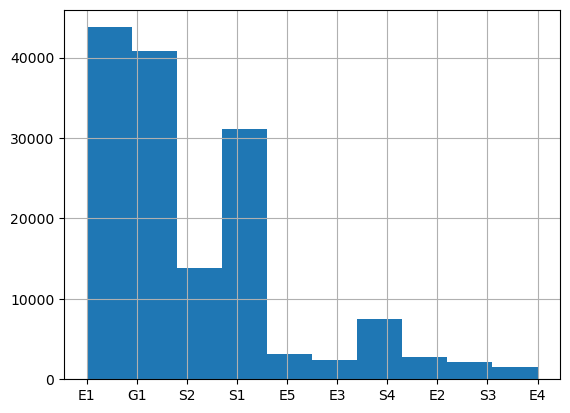

In [19]:
top_results_df.Label.hist()

<AxesSubplot:>

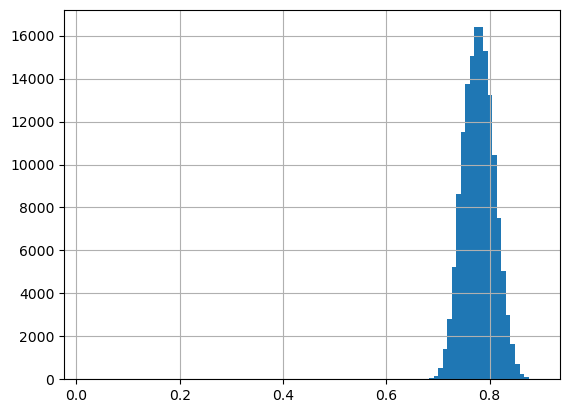

In [20]:
top_results_df.sim_score.hist(bins=100)